Problem 1. 
===
Install newest release of TensorFlow 1.5 on the operating system of your
choice. Use installation instructions on https://www.tensorflow.org site and instructions
on https://github.com/tensorflow/tensorflow. Install TensorFlow for CPU. Use attach
Jupyter notebook: 0_test_install.ipynb to demonstrate that TensorFlow is properly
installed. Please document all installation steps including the version of Python you are
using. (20%)

0_test_install tets code starts
------------------
------------------
This snippet of Python creates a simple graph.

In [4]:
import tensorflow as tf
hello = tf.constant('It works!')
sess = tf.Session()
print(sess.run(hello))

b'It works!'


Check that you have a recent version of TensorFlow installed, >= 0.12.0rc0

In [5]:
print("You have version %s" % tf.__version__)

You have version 1.5.0


We'll also use matplotlib, so let's test if that's working.

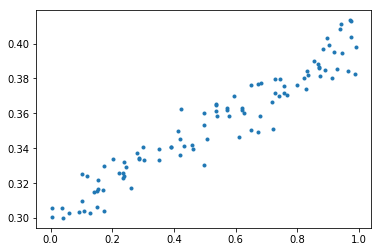

In [6]:
%matplotlib inline
import pylab
import numpy as np

# create some data using numpy. y = x * 0.1 + 0.3 + noise
x_train = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_train))
y_train = x_train * 0.1 + 0.3 + noise

# plot it
pylab.plot(x_train, y_train, '.')

Problem 1 test code end
------------------
------------------

Problem 2. 
===
Represent the following expressions in TensorFlow
$$ y = x^2 + 3$$
$$ 𝑧 = (2 ∗ 𝑦 + 4)/x$$

Calculate and print the value of 𝑦 when 𝑥 is a series of values starting with 1, incremented by 1 and ending at 9. Define variable x with a placeholder so that you could feed different values of 𝑥 while calculating 𝑦. Similarly, calculate and print values of 𝑧. (20%)

In [2]:
import tensorflow as tf


In [18]:
g1 = tf.Graph()
with g1.as_default():
    c3 = tf.constant(3, dtype=tf.int32)
    x = tf.placeholder(tf.int32)
    xx = tf.multiply(x, x)
    y = tf.add(xx, c3)
    for n in range(1, 10):
        with tf.Session() as sess:
            print("Feeding x={} run graph get {}".format(n, sess.run(y, feed_dict={x: n})))
    

Feeding x=1 run graph get 4
Feeding x=2 run graph get 7
Feeding x=3 run graph get 12
Feeding x=4 run graph get 19
Feeding x=5 run graph get 28
Feeding x=6 run graph get 39
Feeding x=7 run graph get 52
Feeding x=8 run graph get 67
Feeding x=9 run graph get 84


Problem 3. 
===
Modify your TensorFlow code so that all variables, constants and operations have a “display name”. Generate a TensorBoard graph representing above equtions. (20%)

Problem 4.
===
Construct a simple neural network (a network of logistic units) which will implement the following truth table.

|x1|x2|x3|y|
|:-|:-|:-|:-|
|0|0|0|0|
|1|0|0|1| 
|0|1|0|1| 
|1|1|0|1| 
|0|0|1|0| 
|1|0|1|0|
|0|1|1|0| 
|1|1|1|0|
Present your neural network as a graph. Use any technique you find convenient, to draw that graph, including pencil and paper. Do scan the drawing and include the image in your submission.
(20%)

Problem 5.
===
Express operations in the above neural network as operations in TensorFlow. Place variables x1 and x2 in one name scope and variables x3 and y in another name scope. Generate the TensorBoard graph of your operations. We are just practicing name scope separation in TensorBoard graphs.
(20%)